In [1]:
import networkx as nx
import network_diffusion as nd
import numpy as np

import network_diffusion.mln.mlnetwork_torch as mlnt
from misc.torch_model import TorchMICModel, TorchMICSimulator

In [2]:
net_p = nd.mln.functions.get_toy_network_piotr()
print(net_p)

network parameters
--------------------------------------------
general parameters:
	number of layers: 3
	number of actors: 11
	number of nodes: 30
	number of edges: 32

layer 'l1' parameters:
	graph type - <class 'networkx.classes.graph.Graph'>
	number of nodes - 10
	number of edges - 10
	average degree - 2.0
	clustering coefficient - 0.2667

layer 'l2' parameters:
	graph type - <class 'networkx.classes.graph.Graph'>
	number of nodes - 10
	number of edges - 11
	average degree - 2.2
	clustering coefficient - 0.0

layer 'l3' parameters:
	graph type - <class 'networkx.classes.graph.Graph'>
	number of nodes - 10
	number of edges - 11
	average degree - 2.2
	clustering coefficient - 0.3167


In [3]:
net_m = nd.MultilayerNetwork.from_nx_layer(nx.les_miserables_graph(), ["l1", "l2", "l3"])
print(net_m)

network parameters
--------------------------------------------
general parameters:
	number of layers: 3
	number of actors: 77
	number of nodes: 231
	number of edges: 762

layer 'l1' parameters:
	graph type - <class 'networkx.classes.graph.Graph'>
	number of nodes - 77
	number of edges - 254
	average degree - 6.5974
	clustering coefficient - 0.5731

layer 'l2' parameters:
	graph type - <class 'networkx.classes.graph.Graph'>
	number of nodes - 77
	number of edges - 254
	average degree - 6.5974
	clustering coefficient - 0.5731

layer 'l3' parameters:
	graph type - <class 'networkx.classes.graph.Graph'>
	number of nodes - 77
	number of edges - 254
	average degree - 6.5974
	clustering coefficient - 0.5731


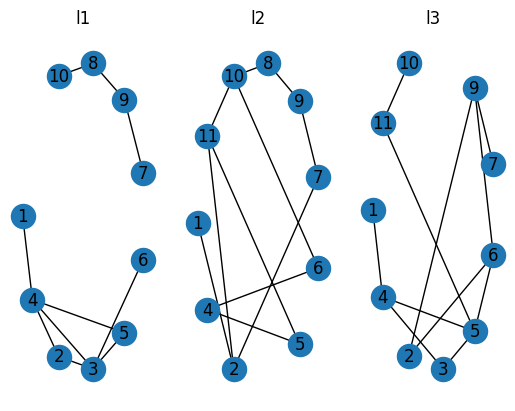

In [4]:
net_raw = net_p
nd.mln.functions.draw_mln(net_raw, 100)

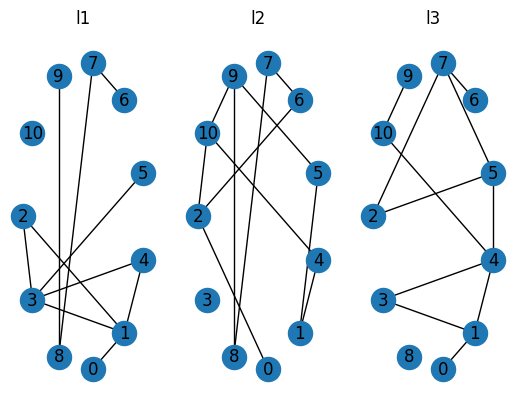

In [5]:
net_converted, ac_map, nodes_added = mlnt.prepare_mln_for_conversion(net_raw)
nd.mln.functions.draw_mln(net_converted, 100)

In [6]:
adjacency_tensor, layers_order = mlnt.mln_to_sparse(net_converted, list(ac_map.values()))
adjacency_tensor.to_dense(), layers_order

(tensor([[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
          [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
          [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
          [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 
         [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
          [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
          [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
          [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
          [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
          [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
          [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
          [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]],
 
    

## Test 1

In [7]:
mlnt.MultilayerNetworkTorch.from_mln(net=net_raw)

MultilayerNetworkTorch at 5360296080
adjacency_tensor: tensor(indices=tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
                         0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
                         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
                         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
                         2,  2,  2,  2,  2,  2,  2,  2],
                       [ 0,  1,  1,  1,  1,  2,  2,  3,  3,  3,  3,  4,  4,  5,
                         6,  7,  7,  8,  8,  9,  0,  1,  1,  2,  2,  2,  4,  4,
                         5,  5,  6,  6,  7,  7,  8,  8,  9,  9,  9, 10, 10, 10,
                         0,  1,  1,  1,  2,  2,  3,  3,  4,  4,  4,  4,  5,  5,
                         5,  6,  7,  7,  7,  9, 10, 10],
                       [ 1,  0,  2,  3,  4,  1,  3,  1,  2,  4,  5,  1,  3,  3,
                         7,  6,  8,  7,  9,  8,  2,  4,  5,  0,  6, 10,  1, 10,
                         1,  9,

In [8]:
net_nd = net_p
net_torch = mlnt.MultilayerNetworkTorch.from_mln(net_nd)

In [9]:
seeds = set()
for actor in net_nd.get_actors():
    if np.random.choice([0, 1], p=[0.8, 0.2]) == 1:
        seeds.add(actor.actor_id)
print(seeds)

{11, 7}


In [10]:
S0 = TorchMICSimulator.create_states_tensor(net_torch, seeds)
S0

{11, 7} -> [10, 6]


tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., -inf],
        [0., 0., 0., -inf, 0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 0., -inf, 0., 1.]])

In [11]:
TorchMICSimulator.S_nodes_to_actors(S0)


tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])

### As in infmax simulator

In [17]:
model = TorchMICModel(protocol="AND", probability=0.9)
simulator = TorchMICSimulator(model=model, net=net_torch, n_steps=10, seed_set={1})
simulator.perform_propagation()

{1} -> [0]
Step: 0, actor-wise states: {0: 10, 1: 1}
Step: 1, actor-wise states: {-1: 1, 0: 10}
Step: 2, actor-wise states: {-1: 1, 0: 10}
Simulation stopped after 2th step


{'simulation_length': 1,
 'exposed': 1,
 'not_exposed': 10,
 'peak_infected': 0,
 'peak_iteration': 0}